In [1296]:
# Abalone Age Detection

from pandas import read_csv, set_option
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from numpy import set_printoptions
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor 
import warnings
warnings.filterwarnings('ignore')

In [1297]:
# loading dataset
pd.pandas.set_option('display.max_columns',None)
path = r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
df = pd.read_csv(path)
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [1298]:
#checking dimension of data
df.shape

(4177, 9)

In [1299]:
# Summarized information of data 
# Check for NUll values, variable datatype,total rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [1300]:
# check for missing or null values per column
df.isnull().sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [1301]:
# Adding Age column  Age= (Rings+1.5)
df['age'] = df['Rings']+1.5
print(df.shape)
df.columns

(4177, 10)


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'age'],
      dtype='object')

In [1302]:
#droping Ring column from dataset
df.drop('Rings', axis = 1, inplace = True)
print(df.shape)
df.info()

(4177, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [1303]:
# Encoding Categorical Variable 
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [1304]:
#Statistical Summary of Data
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


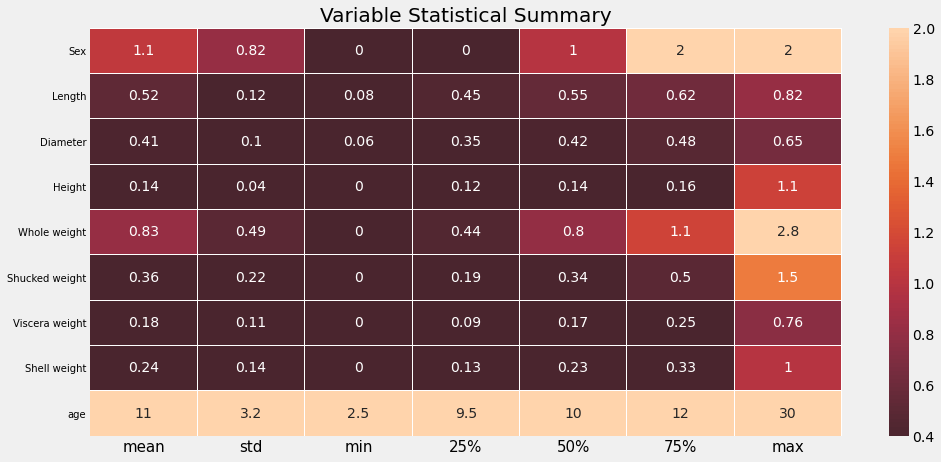

In [1305]:
# Visualization of Statistical distribution of Data
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df.describe()[1:].transpose(),2),vmin=.4, vmax=2, center=0,annot=True,fmt='.2g', linewidths=.1, )
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Variable Statistical Summary")
plt.show()

In [1306]:
#Reviewing Skew of Attribute Distribution
print(df.skew())

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64


In [1307]:
# check for duplicate rows
sum(df.duplicated())

0

<AxesSubplot:xlabel='count', ylabel='age'>

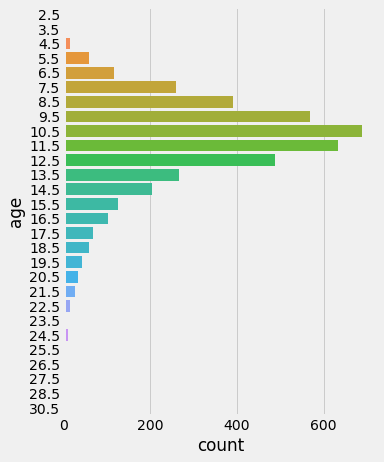

In [1308]:
# # Creating Graph for-----------Categorical(Target) variable
fig, ax = plt.subplots(figsize=(5,7))
sns.countplot(y=df['age'],saturation=0.95,ax=ax)     

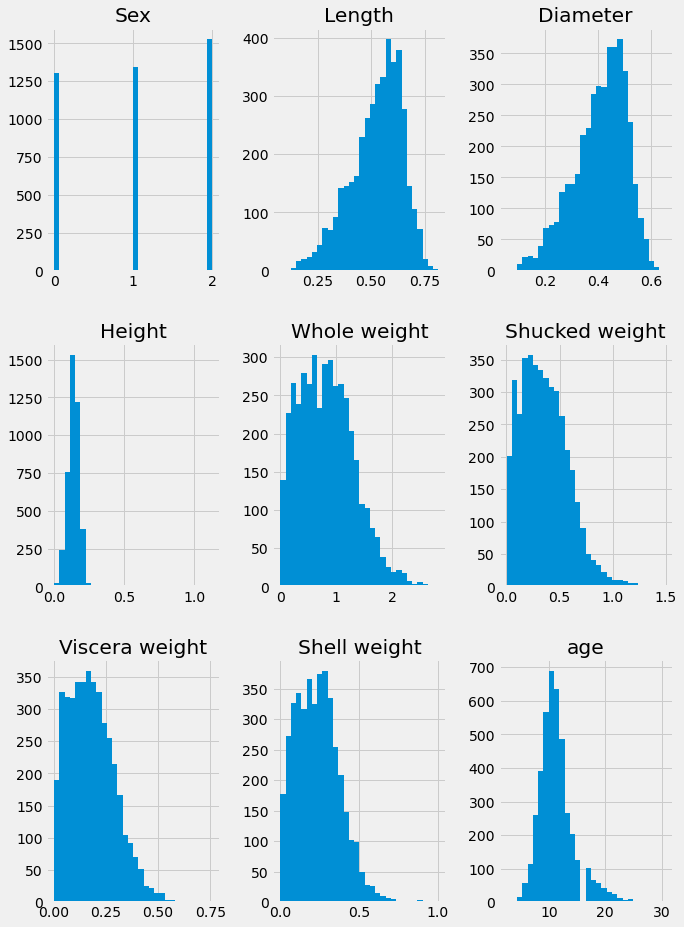

In [1309]:
# Creating Graph for------------ (Predictor) variable           
# All are Selected                                                       
df.hist(bins=30, figsize=(10, 15))
plt.show()

In [1310]:
# TO check variable Type
    #Target Variable(Categorical)     : Age
    #Predictors Variables (Continuous): All except 'sex' is categorical
#Supervised ML Regression Model   
df.nunique()    

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
age                 28
dtype: int64

<AxesSubplot:>

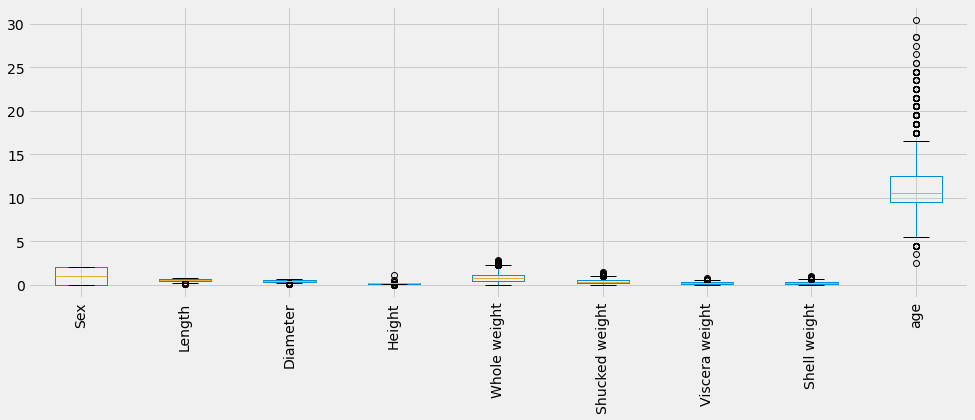

In [1311]:
# checking for outliers
df.boxplot( rot = 90, figsize=(15,5))

In [1312]:
# Outlier Check
print(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index)

# outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)


Int64Index([ 170, 1048, 1052, 1204, 1206, 1207, 1422, 1427, 1757, 1759, 1762,
            1763, 2623, 2624, 2709, 2710, 2810, 2811, 2863, 3427, 3628, 3715,
            4148],
           dtype='int64')


In [1313]:
# Outlier Check
print(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index)

# outliers removal
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)

Int64Index([  81,  129,  157,  163,  164,  165,  166,  167,  168,  169,  277,
             334,  358,  375,  468,  882,  891, 1193, 1428, 1761, 1823, 1985,
            2088, 2090, 2157, 2161, 2208, 2210, 2265, 2274, 2334, 2368, 2542,
            2973, 3008, 3148, 3151, 3188, 3599, 3928, 3993, 4145],
           dtype='int64')


In [1314]:
# Outlier Check
print(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index)
print(df[(df['Shucked weight']<1) & (df['age'] > 20)].index)

# outliers removal
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

Int64Index([1051, 1197, 1199, 1202, 1209, 1417, 1418, 1426, 1527, 1528, 1754,
            1756, 1821, 1982, 2544, 2625, 2675, 2862, 3007, 3082, 3713, 3961,
            3962],
           dtype='int64')
Int64Index([   6,    9,   33,   72,   83,  128,  181,  232,  256,  270,  275,
             278,  293,  310,  312,  313,  314,  351,  355,  362,  365,  372,
             416,  417,  427,  428,  431,  433,  442,  469,  478,  483,  497,
             501,  530,  572,  582,  593,  628,  642,  664,  672,  673,  674,
             675,  678,  744,  754,  756,  811, 2101, 2160, 2176, 2180, 2199,
            2202, 2275, 2277, 2305, 2335, 2344, 2351, 2358, 2366, 2436, 2459,
            2471, 2499, 3140, 3193, 3244, 3319, 3359, 3360, 3373, 3381, 3392,
            3865, 3914, 3924, 3930, 3944],
           dtype='int64')


In [1315]:
# Outlier Check
print(df[(df['Diameter']<0.1) & (df['age'] < 5)].index)
print(df[(df['Diameter']>=0.6) & (df['age']< 25)].index)

# outliers removal
df.drop(df[(df['Diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

Int64Index([236, 238], dtype='int64')
Int64Index([1423, 3992], dtype='int64')


In [1316]:
# Outlier Check
print(df[(df['Height']>0.4) & (df['age'] < 15)].index)


# outliers removal
df.drop(df[(df['Height']>0.4) & (df['age'] < 15)].index, inplace=True)

Int64Index([2051], dtype='int64')


In [1317]:
# Removing Outliers
z=np.abs(zscore(df))
z.shape
threshold=3
print(np.where(z>3))


df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(array([  30,  217,  217,  218,  278,  286,  322,  324,  384,  385,  386,
        387,  402,  472,  472,  535,  555,  563,  598,  600,  628,  628,
        628,  630,  630,  653,  653,  653,  654,  654,  654,  668, 1099,
       1174, 1328, 1339, 1339, 1657, 1658, 1658, 1664, 1883, 1884, 1884,
       1884, 2006, 2006, 2043, 2051, 2058, 2058, 2067, 2087, 2150, 2210,
       2224, 2233, 2234, 2250, 2250, 2285, 2287, 2300, 2342, 2823, 2825,
       3011, 3034, 3038, 3065, 3080, 3101, 3116, 3121, 3142, 3159, 3223,
       3231, 3236, 3306, 3630, 3667, 3693, 3728, 3728, 3731, 3731, 3746,
       3816], dtype=int64), array([8, 1, 2, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 1, 2, 8, 8, 8, 8, 8, 1, 2,
       3, 1, 2, 1, 2, 3, 1, 2, 3, 8, 3, 3, 6, 1, 2, 5, 5, 6, 6, 1, 1, 2,
       3, 1, 2, 8, 6, 1, 3, 3, 8, 8, 8, 8, 8, 8, 1, 3, 8, 8, 8, 8, 5, 5,
       8, 3, 8, 8, 8, 8, 8, 8, 6, 1, 8, 8, 8, 1, 4, 2, 8, 1, 2, 1, 3, 8,
       3], dtype=int64))
(3924, 9)


In [1318]:
#removing outlier by IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)


(3777, 9)


In [1319]:
# Anova Test 
from scipy.stats import f_oneway
cp=df.iloc[:,[0,1,2,3,4,5,6,7]]
sp=[]
for i in cp:
    cg=df.groupby('age')[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')


Sex ------not correlated-----: 0.5247302813727267 

Length ------correlated------: 0.0 

Diameter ------correlated------: 0.0 

Height ------correlated------: 0.0 

Whole weight ------correlated------: 0.0 

Shucked weight ------correlated------: 0.0 

Viscera weight ------correlated------: 0.0 

Shell weight ------correlated------: 0.0 



In [1320]:
# Reviewing Correlation between Attributes
co_rel = df.corr(method='pearson')
co_rel

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,1.000000,-0.037882,-0.040880,-0.045456,-0.030186,-0.012402,-0.038854,-0.039861,-0.023514
Length,-0.037882,1.000000,0.986177,0.895815,0.940445,0.914961,0.914073,0.923842,0.591033
Diameter,-0.040880,0.986177,1.000000,0.901180,0.938449,0.908441,0.908686,0.929929,0.608279
Height,-0.045456,0.895815,0.901180,1.000000,0.894032,0.848454,0.874759,0.901944,0.619582
Whole weight,-0.030186,0.940445,0.938449,0.894032,1.000000,0.973590,0.966817,0.962273,0.563010
Shucked weight,-0.012402,0.914961,0.908441,0.848454,0.973590,1.000000,0.930204,0.903939,0.471197
Viscera weight,-0.038854,0.914073,0.908686,0.874759,0.966817,0.930204,1.000000,0.923066,0.548263
Shell weight,-0.039861,0.923842,0.929929,0.901944,0.962273,0.903939,0.923066,1.000000,0.626839
age,-0.023514,0.591033,0.608279,0.619582,0.563010,0.471197,0.548263,0.626839,1.000000


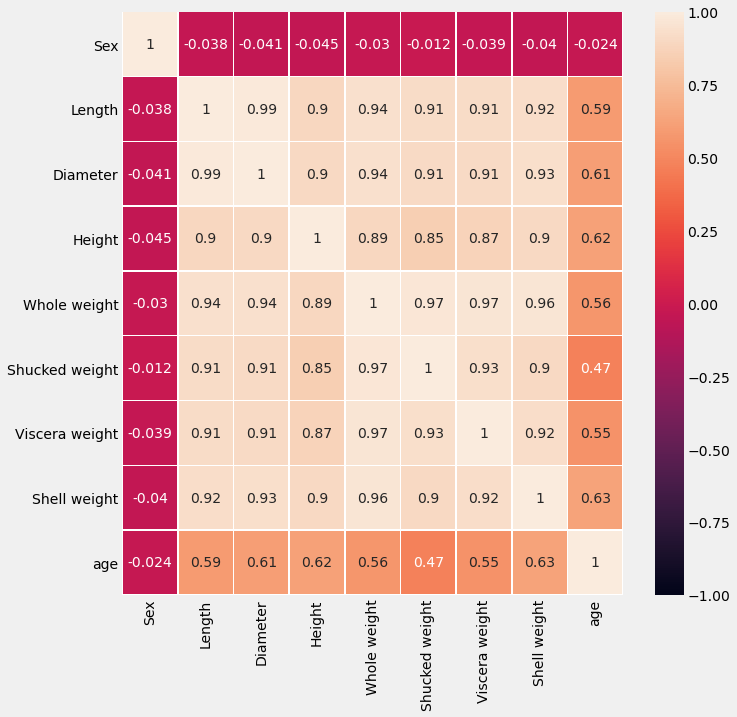

In [1321]:
# Heatmap to check correlation
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(co_rel,vmin=-1, vmax=1, annot=True, linewidths=.5, ax=ax)
plt.show()

In [1322]:
#Correlation with the output variable
cor = df.corr()
ctarget = abs(cor['age'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('weak correlated :',result2)

strong correlated : ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'age']
weak correlated : ['Sex']


In [1323]:
# removing less correlated feature
newdf=df.drop(["Sex"],axis=1)
newdf.shape

(3777, 8)

In [1324]:
# Printing all the column names selected
newdf.columns


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [1325]:
# dividing the dataset into Target and features variables

x = newdf.iloc[:,:7]
y = newdf.iloc[:,-1]

# determining the shape of x and y.
print(x.shape)
print('x :',x.columns)
print(y.shape)
print('y :',y.values)

(3777, 7)
x : Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')
(3777,)
y : [16.5  8.5 10.5 ... 10.5 11.5 13.5]


In [1326]:
# dividing the dataset in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2832, 7)
(2832,)
(945, 7)
(945,)


In [1327]:
#Normalization 

x=power_transform(x,method='yeo-johnson')
x

array([[-0.67372484, -0.52676959, -1.17556078, ..., -0.52986092,
        -0.67519577, -0.56617488],
       [-1.43724474, -1.42454798, -1.30517831, ..., -1.31916532,
        -1.33988999, -1.34103142],
       [-0.01618251,  0.0714129 , -0.08919493, ..., -0.34819972,
        -0.21550258, -0.04021159],
       ...,
       [ 0.69194564,  0.75309429,  2.03278312, ...,  0.93151698,
         1.14092336,  0.73353604],
       [ 0.96862304,  0.88661651,  0.3413697 , ...,  0.95388084,
         0.92447179,  0.6439149 ],
       [ 2.01022189,  1.90998325,  1.71179386, ...,  2.33933853,
         1.790617  ,  1.97664183]])

In [1328]:
# Sandardization of data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[ 2.72919437e-01  2.80692133e-01  2.31134548e-01 ... -2.12413529e-01
  -2.06227382e-01  3.17678816e-04]
 [ 5.83627237e-01  4.94855296e-01  3.71933223e-01 ...  5.96184450e-01
   3.01565027e-01  3.17678816e-04]
 [ 7.61174551e-01  1.19088557e+00  9.35127922e-01 ...  1.24994452e+00
   1.21260435e+00  8.71358336e-01]
 ...
 [ 4.94853580e-01  6.01936877e-01  7.94329247e-01 ...  7.51022362e-01
   4.16067238e-01  4.62419061e-01]
 [-1.70948849e-01  1.73610551e-01 -5.04628019e-02 ... -2.14871274e-01
  -3.10772878e-01 -1.50989853e-01]
 [-3.92882991e-01 -2.01174984e-01 -4.72858826e-01 ... -2.78772634e-01
  -8.18565288e-01 -5.88554878e-01]]
[[ 1.26050815  1.39218574  1.36650723 ...  0.74154977  0.7304984
   2.21450903]
 [ 1.48703717  1.28167624  0.3657937  ...  0.59455069  1.20053311
   1.46788404]
 [ 1.758872    1.77896897  1.08058908 ...  2.09443958  2.46562655
   1.57987779]
 ...
 [ 1.35111976  1.33693099  1.50946631 ...  1.15264888  1.81057817
   1.79971737]
 [ 1.12459074  1.115912    0.7946709

In [1329]:
# MOdel Building using Linear Regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.5069694951115292
Score On Test Data: 0.45969758068737554
Mean Absolute Error: 1.3140238671803774
Mean Squared Error: 2.842113243139804
Root Mean Squared Error: 1.6858568275923682


In [1330]:
# Lasso
regressor = Lasso()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Score On Train Data: 0.22392476850135734
Score On Test Data: 0.2216650716010139
Mean Absolute Error: 1.6063124604660521
Mean Squared Error: 4.094218216559709
Root Mean Squared Error: 2.0234174597842407


In [1331]:
# LassoCV
regressor = LassoCV()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.5068033914424901
Score On Test Data: 0.46071212563598907
Mean Absolute Error: 1.312335079283625
Mean Squared Error: 2.836776506654553
Root Mean Squared Error: 1.6842732874015882


In [1332]:
# Ridge
regressor = Ridge()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.5069422554698638
Score On Test Data: 0.46021007216157706
Mean Absolute Error: 1.3133182718298058
Mean Squared Error: 2.8394174217742854
Root Mean Squared Error: 1.6850570974819474


In [1333]:
# RidgeCV
regressor = RidgeCV()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
#y_pred.head(2)


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.5069422554698644
Score On Test Data: 0.4602100721611224
Mean Absolute Error: 1.3133182718298664
Mean Squared Error: 2.8394174217766768
Root Mean Squared Error: 1.685057097482657


In [1334]:
# Random Forest MOdel

regressor = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
#y_pred.head(2)

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.5801393092604389
Score On Test Data: 0.513440411590069
Mean Absolute Error: 1.2418104851135003
Mean Squared Error: 2.5594137660086647
Root Mean Squared Error: 1.5998167913885217


In [1335]:
#Decision Tree   

regressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.5920093549104006
Score On Test Data: 0.435097814130576
Mean Absolute Error: 1.3255679786271213
Mean Squared Error: 2.971513593406927
Root Mean Squared Error: 1.7238078760137183


In [1336]:
#Adaboost  
DTR=DecisionTreeRegressor(max_depth=10)
regressor =  AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score On Train Data: 0.8676231960092186
Score On Test Data: 0.5185995873014305
Mean Absolute Error: 1.212633417964592
Mean Squared Error: 2.53227533188579
Root Mean Squared Error: 1.5913124557690705


In [1337]:
# K-Nearest Neighbor(KNN)
regressor =  KNeighborsRegressor(n_neighbors=2)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Score On Train Data: 0.7780173966545685
Score On Test Data: 0.32165396420319337
Mean Absolute Error: 1.452910052910053
Mean Squared Error: 3.5682539682539685
Root Mean Squared Error: 1.8889822572628807


In [1338]:
#Adaboost as the final model 

In [1339]:
# Separate Target Variable and Predictor Variables

x = newdf.iloc[:,:7]
y = newdf.iloc[:,-1]

X=x.values
Y=y.values

PScaler=MinMaxScaler()
PScalerFit=PScaler.fit(X)

X=PScalerFit.transform(X)

print(X.shape)
print(y.shape)

(3777, 7)
(3777,)


In [1340]:
# Retraining the Model 
DTR=DecisionTreeRegressor(max_depth=10)
regressor =  AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
Final_Model=regressor.fit(X,y)

# Calculating R2 Score
r2_score =regressor.score(X, y)
print('r2 Score:',r2_score)

r2 Score: 0.8352566505985646


In [1341]:
# Model Saving
import pickle
filename='Abalone Age.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
